# Explicit Lyrics Rater
This application takes in pasted song lyrics as a string, then returns a score of how explicit the song is.
--Phase 2-- scrape Google Play's website for lyrics.

In [106]:
import re
import pandas as pd
import numpy as np
import json
from collections import Counter
#import requests
#from bs4 import BeautifulSoup as bs
#from urllib.request import urlopen
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [153]:
with open ('songs.txt', 'rb') as fp:
    itemlist = pickle.load(fp)
    fp.close()

In [154]:
itemlist

[['Big 10 Inch Record', 'Bull Moose Jackson', 0, 0, 0, 0, 0, 0, 0, 0, 218, 0],
 ['The End', 'The Doors', 0, 0, 0, 0, 0, 1, 0, 0, 352, 6],
 ['Sex Rap', 'Red Hot Chili Peppers', 1, 3, 1, 0, 0, 3, 0, 0, 259, 28],
 ['Sex Rap', 'Red Hot Chili Peppers', 1, 3, 1, 0, 0, 3, 0, 0, 254, 28],
 ['You Fucked Up', 'Ween', 0, 1, 0, 0, 0, 10, 1, 0, 73, 69],
 ['Nigga Nigga Nigga', 'Gangsta Rap', 0, 1, 0, 1, 0, 3, 0, 34, 250, 296],
 ['The Hills', 'The Weeknd', 0, 0, 0, 1, 0, 14, 0, 0, 481, 88],
 ['Backstreet Freestyle', 'Kendrick Lamar', 8, 12, 0, 5, 0, 7, 0, 3, 574, 118],
 ['King of Everything', 'Wiz Khalifa', 0, 0, 9, 5, 0, 8, 0, 5, 463, 135],
 ["Hate Bein' Sober", 'Chief Keef', 3, 0, 1, 15, 0, 0, 0, 4, 564, 98],
 ['I Am The Hardest', 'Big Ed', 0, 0, 0, 3, 0, 5, 0, 8, 467, 106],
 ['The Next Episode', 'Dr. Dre', 0, 2, 2, 6, 0, 4, 0, 7, 410, 114],
 ['Hard In Da Paint', 'Waka Flocka Flame', 0, 7, 0, 6, 0, 21, 0, 31, 536, 412],
 ['Muthafucker Up', 'Tyga', 1, 4, 0, 13, 0, 2, 0, 8, 572, 137],
 ['Killing in t

In [148]:
potty_mouth = {'4r5e':1,"5h1t":4,"5hit":4,"a55":2,"anal":5,"anus":1,"ar5e":1,"arrse":1,"arse":1,"ass":2,"ass-fucker":2,"asses":2,"assfucker":2,"assfukka":2,"asshole":2,"assholes":2,"asswhole":2,"a_s_s":2,'b!tch':4,"b00bs":3,"b17ch":4,"b1tch":4,"ballbag":1,"balls":2,"ballsack":2,"bastard":3,"beastial":3,"beastiality":3,"bellend":2,"bestial":3,"bestiality":3,"bi+ch":4,"biatch":4,"bitch":4,"bitcher":4,"bitchers":4,"bitches":4,"bitchin":4,"bitching":4,"bloody":1,"blow job":5,"blowjob":5,"blowjobs":5,"blunt":3,"boiolas":1,"bollock":1,"bollok":1,"boner":2,"boob":3,"boobs":3,"booobs":3,"boooobs":3,"booooobs":3,"booooooobs":3,"breasts":2,"buceta":3,"bugger":1,"bum":1,"bunny fucker":6,"butt":1,"butthole":2,"buttmuch":1,"buttplug":6,"c0ck":3,"c0cksucker":3,"carpet muncher":2,"cawk":1,"chink":1,"cipa":1,"cl1t":4,"clit":4,"clitoris":4,"clits":4,"cnut":4,"cocaine":3,"cock":5,"cock-sucker":5,"cockface":5,"cockhead":5,"cockmunch":5,"cockmuncher":5,"cocks":5,"cocksuck ":5,"cocksucked ":5,"cocksucker":5,"cocksucking":5,"cocksucks ":5,"cocksuka":5,"cocksukka":5,"cok":5,"cokmuncher":5,"coksucka":5,"coon":1,"cox":2,"crap":1,"cum":6,"cummer":6,"cumming":6,"cums":6,"cumshot":6,"cunilingus":7,"cunillingus":7,"cunnilingus":7,"cunt":7,"cuntlick ":7,"cuntlicker ":7,"cuntlicking ":7,"cunts":7,"cyalis":1,"cyberfuc":6,"cyberfuck ":6,"cyberfucked ":6,"cyberfucker":6,"cyberfuckers":6,"cyberfucking":6,"d1ck":2,"damn":1,"dick":2,"dickhead":2,"dildo":5,"dildos":5,"dink":1,"dinks":1,"dirsa":1,"dlck":2,"dog-fucker":7,"doggin":2,"dogging":2,"donkeyribber":1,"doosh":3,"duche":3,"dyke":3,"ejaculate":5,"ejaculated":5,"ejaculates ":5,"ejaculating ":5,"ejaculatings":5,"ejaculation":5,"ejakulate":5,"f u c k":6,"f u c k e r":6,"f4nny":1,"fag":4,"fagging":4,"faggitt":4,"faggot":4,"faggs":4,"fagot":4,"fagots":4,"fags":4,"fanny":3,"fannyflaps":3,"fannyfucker":6,"fanyy":2,"fatass":3,"fcuk":6,"fcuker":6,"fcuking":6,"feck":6,"fecker":6,"felching":4,"fellate":5,"fellatio":5,"fingerfuck ":7,"fingerfucked ":7,"fingerfucker ":7,"fingerfuckers":7,"fingerfucking ":7,"fingerfucks ":7,"fistfuck":7,"fistfucked ":7,"fistfucker ":7,"fistfuckers ":7,"fistfucking ":7,"fistfuckings ":7,"fistfucks ":7,"flange":2,"fook":6,"fooker":6,"fuck":6,"fucka":6,"fucked":6,"fucker":6,"fuckers":6,"fuckhead":6,"fuckheads":6,"fuckin":6,"fuckin'":6,"fucking":6,"fuckings":6,"fuckingshitmotherfucker":8,"fuckme ":6,"fucks":6,"fuckwhit":6,"fuckwit":6,"fudge packer":4,"fudgepacker":4,"fuk":6,"fuker":6,"fukker":6,"fukkin":6,"fuks":6,"fukwhit":6,"fukwit":6,"fux":6,"fux0r":6,"f_u_c_k":6,"gangbang":6,"gangbanged ":6,"gangbangs ":6,"gaylord":2,"gaysex":5,"goatse":2,"God":1,"god-dam":2,"god-damned":2,"goddamn":2,"goddamned":2,"hardcoresex ":4,"hell":1,"heshe":2,"hoar":4,"hoare":4,"hoer":4,"homo":4,"hore":4,"horniest":3,"horny":3,"hotsex":3,"jack-off ":3,"jackoff":3,"jap":4,"jerk-off ":3,"jism":5,"jiz ":5,"jizm ":5,"jizz":5,"joint":3,"kawk":2,"knob":1,"knobead":1,"knobed":1,"knobend":1,"knobhead":1,"knobjocky":1,"knobjokey":1,"kock":4,"kondum":4,"kondums":4,"kum":4,"kummer":4,"kumming":4,"kums":4,"kunilingus":2,"l3i+ch":4,"l3itch":4,"labia":1,"lmfao":1,"lust":2,"lusting":2,"m0f0":1,"m0fo":1,"m45terbate":3,"ma5terb8":3,"ma5terbate":3,"masochist":2,"master-bate":3,"masterb8":3,"masterbat*":3,"masterbat3":3,"masterbate":3,"masterbation":3,"masterbations":3,"masturbate":3,"mo-fo":1,"mof0":1,"mofo":1,"mothafuck":6,"mothafucka":6,"mothafuckas":6,"mothafuckaz":6,"mothafucked ":6,"mothafucker":6,"mothafuckers":6,"mothafuckin":6,"mothafuckin'":6,"mothafucking ":6,"mothafuckings":6,"mothafucks":6,"mother fucker":6,"motherfuck":6,"motherfucked":6,"motherfucker":6,"motherfuckers":6,"motherfuckin":6,"motherfucking":6,"motherfuckings":6,"motherfuckka":6,"motherfucks":6,"muff":1,"mutha":1,"muthafecker":6,"muthafuckker":6,"muthafuckas":6,"muther":1,"mutherfucker":6,"mu'fuckin'":6,"n1gga":8,"n1gger":8,"nazi":7,"nigg3r":8,"nigg4h":8,"nigga":8,"nigga!":8,"niggah":8,"niggas":8,"niggas!":8,"niggaz":8,"nigger":8,"niggers ":8,"nob":1,"nob jokey":1,"nobhead":1,"nobjocky":1,"nobjokey":1,"numbnuts":2,"nutsack":2,"orgasim ":2,"orgasims ":2,"orgasm":2,"orgasms ":2,"p0rn":2,"pawn":1,"pecker":4,"penis":5,"penisfucker":6,"phonesex":2,"phuck":6,"phuk":6,"phuked":6,"phuking":6,"phukked":6,"phukking":6,"phuks":6,"phuq":6,"pigfucker":6,"pimpis":1,"piss":2,"pissed":2,"pisser":2,"pissers":2,"pisses ":2,"pissflaps":2,"pissin ":2,"pissing":2,"pissoff ":2,"poop":1,"porn":2,"porno":2,"pornography":2,"pornos":2,"prick":1,"pricks ":1,"pron":1,"pube":1,"pusse":2,"pussi":2,"pussies":2,"pussy":2,"pussys ":2,"rectum":1,"retard":1,"rimjaw":2,"rimming":2,"s hit":4,"s.o.b.":1,"sadist":1,"schlong":1,"screwing":1,"scroat":1,"scrote":2,"scrotum":2,"semen":2,"sex":2,"sh!+":2,"sh!t":2,"sh1t":2,"shag":2,"shagger":2,"shaggin":2,"shagging":2,"shemale":2,"shi+":4,"shit":4,"shitdick":5,"shite":14,"shited":4,"shitey":4,"shitfuck":6,"shitfull":4,"shithead":4,"shiting":4,"shitings":4,"shits":4,"shitted":4,"shitter":4,"shitters ":4,"shitting":4,"shittings":4,"shitty ":4,"skank":2,"slut":2,"sluts":2,"smegma":1,"smut":1,"snatch":3,"son-of-a-bitch":1,"spac":1,"spunk":1,"s_h_i_t":3,"t1tt1e5":3,"t1tties":3,"teets":1,"teez":1,"testical":1,"testicle":1,"tit":3,"titfuck":3,"tits":3,"titt":3,"tittie5":4,"tittiefucker":6,"titties":4,"tittyfuck":6,"tittywank":1,"titwank":3,"tosser":1,"turd":1,"tw4t":2,"twat":2,"twathead":2,"twatty":2,"twunt":2,"twunter":2,"v14gra":1,"v1gra":1,"vagina":3,"viagra":1,"vulva":2,"w00se":1,"wang":1,"wank":1,"wanker":1,"wanky":1,"weed":3,"whoar":1,"whore":2,"willies":1,"willy":1,"xrated":2,"xxx":2,
}

In [126]:
#lyrics_rating_list = []

In [127]:
def add_song():
    '''
    Adds song to lyrics_rating_list
    Includes the Title, Artist, Lyrics, and the rating of the explicit level of the lyrics
    The explicit words are from google's list of flagged words, which I assigned a rating of 1-8,
    8 being the highest, depending on the severity of the word.  
    
    '''
    lyrics_rating = []
    
    #takes 3 inputs, title, artist, and lyrics 
    title = input('What is the name of the song? ')
    artist = input('What is the name of the Artist? ')
    lyrics = input('Paste song lyrics here:')
    
    # Check to see if each word is in the 'potty mouth' word list. 
    # If it is, return the value of the explicit word.
    lyrics = lyrics.lower().split(' ')
    for i in lyrics:
        if i in potty_mouth:
            lyrics_rating.append(potty_mouth[i])
    
    # 
    count = Counter(lyrics_rating)
    
    # Set score variable for total cumulative explicit score of the song
    score = 0 
    
    # create array with title, artist, a count of each values, length of the song, and the score
    for i in range(0,9):
        score += i * count[i]
    lyrics_rating_list.append([title, artist, count[1],count[2],count[3],count[4],count[5],count[6],count[7],count[8],len(lyrics), score])
    
    # create DataFrame from song rating list
    song_rating_list = pd.DataFrame(lyrics_rating_list, columns=['Song','Artist','Level 1 Explitive','Level 2 Explitive','Level 3 Explitive',
                                          'Level 4 Explitive','Level 5 Explitive','Level 6 Explitive',
                                          'Level 7 Explitive','Level 8 Explitive','Song Length (Words)','Explicit Score'])
    with open('songs.txt', 'wb') as fp:
        pickle.dump(lyrics_rating_list, fp)
    return song_rating_list

In [155]:
s = add_song()

What is the name of the song? Elevated
What is the name of the Artist? Wiz Khalifa
Paste song lyrics here:Scared money don’t make money, so what you scared for? And real people do real things, so what you waiting for? A stand up nigga stand up the rest of their lives (Yeah) And real G’s do what they want, don’t ever think twice  Uh, it go, one for the money Two for the niggas gettin’ it Three for the niggas that be running from it You gotta grind if you really want it Don’t hesitate You came this far now finish out your whole dream Nobody said it’d be easy though, just stick to your plan They don’t understand Going up against the odds Having no regards Make our own laws, you can be your own boss But they don’t tell you that all you need is a foundation to stand on And you can build it then the limit is the sky Until then I’m with my niggas getting high And plus we with it you all know the business  [Hook:] Scared money don’t make money, so what you scared for? And real people do real t

In [156]:
s

,Song,Artist,Level 1 Explitive,Level 2 Explitive,Level 3 Explitive,Level 4 Explitive,Level 5 Explitive,Level 6 Explitive,Level 7 Explitive,Level 8 Explitive,Song Length (Words),Explicit Score
0,Big 10 Inch Record,Bull Moose Jackson,0,0,0,0,0,0,0,0,218,0
1,The End,The Doors,0,0,0,0,0,1,0,0,352,6
2,Sex Rap,Red Hot Chili Peppers,1,3,1,0,0,3,0,0,259,28
3,Sex Rap,Red Hot Chili Peppers,1,3,1,0,0,3,0,0,254,28
4,You Fucked Up,Ween,0,1,0,0,0,10,1,0,73,69
5,Nigga Nigga Nigga,Gangsta Rap,0,1,0,1,0,3,0,34,250,296
6,The Hills,The Weeknd,0,0,0,1,0,14,0,0,481,88
7,Backstreet Freestyle,Kendrick Lamar,8,12,0,5,0,7,0,3,574,118
8,King of Everything,Wiz Khalifa,0,0,9,5,0,8,0,5,463,135
9,Hate Bein' Sober,Chief Keef,3,0,1,15,0,0,0,4,564,98


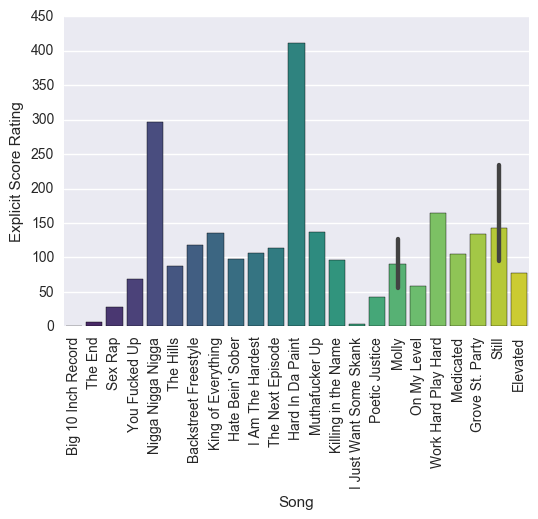

In [157]:
p = sns.barplot(x = 'Song', y='Explicit Score',data = s, palette='viridis')
for i in p.get_xticklabels():
    i.set_rotation(90)
plt.ylabel('Explicit Score Rating')

In [175]:
#def test_count():
#    lyrics_rating = []
#    title = input('What is the name of the song? ')
#    artist = input('What is the name of the Artist? ')
#    lyrics = input('Paste song lyrics here:')
#    lyrics = lyrics.lower().split(' ')
#    for i in lyrics:
#        if i in potty_mouth:
#            lyrics_rating.append(potty_mouth[i])
#    count = Counter(lyrics_rating)
#    score = 0 
#    for i in range(0,9):
#        score += i * count[i]
#    return count